In [374]:
import MySQLdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [375]:
myvars = {}
with open("aawasth-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Fa21grp07_db')
cursor = conn.cursor()
cursor.execute('select * from VAERSDATA2');
vaers_data = cursor.fetchall()
#vaers_data
cursor.execute('select * from VAERSSYMPTOMS2');
vaers_symptoms = cursor.fetchall()
#vaers_symptoms
cursor.execute('select * from VAERSVAX2');
vaers_vax = cursor.fetchall()
#vaers_vax
cursor.execute('select * from BIRTH_DEFECT');
birth_defect = cursor.fetchall()
#birth_defect variable

In [376]:
data = pd.DataFrame(vaers_data)
symptoms = pd.DataFrame(vaers_symptoms)
vax = pd.DataFrame(vaers_vax)
birth_defect = pd.DataFrame(birth_defect)

In [377]:
# data shape is 34121 by 18
print(data.shape)

# symptoms shape is now 34121 by 2
print(symptoms.shape)

# vax shape is 33808 by 3
print(vax.shape)

# birth defect is 34121 by 2
print(birth_defect.shape)

# difference between 34121 and 33808 should be removed as it is incomplete data

(34121, 18)
(34121, 2)
(33808, 3)
(34121, 2)


In [378]:
sum(data[2]=='')

3188

In [379]:
sum(data[1]=='')

5571

In [380]:
sum(vax.duplicated())

0

In [381]:
pd.set_option('display.max_rows', 10)
#vax[vax.duplicated()]
sum(vax[2]=='')

0

In [382]:
data2 = data.rename(columns = {0:'vaers_id',1:'state',2:'age_yrs',3:'sex',4:'died',5:'l_threat',6:'er_visit',7:'hospital',
                              8:'hospdays',9:'disable',10:'recovd',11:'vax_date',12:'onset_date',13:'numdays',14:'other_meds',
                              15:'cur_ill',16:'history',17:'allergies'}).copy()

In [383]:
data2.head()

,vaers_id,state,age_yrs,sex,died,l_threat,er_visit,hospital,hospdays,disable,recovd,vax_date,onset_date,numdays,other_meds,cur_ill,history,allergies
0,916600,TX,33,F,0,0,0,0,0,0,Y,12/28/2020,12/30/2020,2,0,0,0,Pcn and bee venom
1,916601,CA,73,F,0,0,0,0,0,0,Y,12/31/2020,12/31/2020,0,1,1,1,"""Dairy"""
2,916602,WA,23,F,0,0,0,0,0,0,U,12/31/2020,12/31/2020,0,0,0,0,Shellfish
3,916603,WA,58,F,0,0,0,0,0,0,Y,12/23/2020,12/23/2020,0,0,1,1,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,TX,47,F,0,0,0,0,0,0,N,12/22/2020,12/29/2020,7,1,1,0,Na


In [384]:
symptoms2 = symptoms.rename(columns = {0:'vaers_id',1:'symptom_count'}).copy()

In [385]:
symptoms2.head()

,vaers_id,symptom_count
0,916600,2
1,916601,2
2,916602,4
3,916603,3
4,916604,4


In [386]:
vax2 = vax.rename(columns = {0:'vaers_id',1:'vax_type',2:'vax_manu'}).copy()

In [387]:
vax2['vaers_id'] = vax2['vaers_id'].astype('int64')

In [388]:
vax2.dtypes

vaers_id     int64
vax_type    object
vax_manu    object
dtype: object

In [389]:
symptoms2['vaers_id'] = symptoms2['vaers_id'].astype('int64')

In [390]:
symptoms2.dtypes

vaers_id         int64
symptom_count    int64
dtype: object

In [391]:
data2['vaers_id'] = data2['vaers_id'].astype('int64')

In [392]:
data2.dtypes

vaers_id       int64
state         object
age_yrs       object
sex           object
died           int64
               ...  
numdays       object
other_meds     int64
cur_ill        int64
history        int64
allergies     object
Length: 18, dtype: object

In [393]:
birth_defect2 = birth_defect.rename(columns = {0:'vaers_id',1:'birth_defect'}).copy()

In [394]:
birth_defect2['vaers_id'] = birth_defect2['vaers_id'].astype('int64')
birth_defect2.dtypes

vaers_id         int64
birth_defect    object
dtype: object

In [395]:
covid_df = data2.merge(birth_defect2.merge(vax2.merge(symptoms2, on='vaers_id'), on='vaers_id'), on='vaers_id')
pd.set_option('display.max_columns', None)
covid_df.head()

,vaers_id,state,age_yrs,sex,died,l_threat,er_visit,hospital,hospdays,disable,recovd,vax_date,onset_date,numdays,other_meds,cur_ill,history,allergies,birth_defect,vax_type,vax_manu,symptom_count
0,916600,TX,33,F,0,0,0,0,0,0,Y,12/28/2020,12/30/2020,2,0,0,0,Pcn and bee venom,,COVID19,MODERNA,2
1,916601,CA,73,F,0,0,0,0,0,0,Y,12/31/2020,12/31/2020,0,1,1,1,"""Dairy""",,COVID19,MODERNA,2
2,916602,WA,23,F,0,0,0,0,0,0,U,12/31/2020,12/31/2020,0,0,0,0,Shellfish,,COVID19,PFIZER\BIONTECH,4
3,916603,WA,58,F,0,0,0,0,0,0,Y,12/23/2020,12/23/2020,0,0,1,1,"Diclofenac, novacaine, lidocaine, pickles, tom...",,COVID19,MODERNA,3
4,916604,TX,47,F,0,0,0,0,0,0,N,12/22/2020,12/29/2020,7,1,1,0,Na,,COVID19,MODERNA,4


In [396]:
covid_df.shape
# 33808 rows 22 columns, checks out

(33808, 22)

In [397]:
covid_df['birth_defect'].value_counts()

# 51 patients have a birth defect, 33757 empty values

     33757
Y       51
Name: birth_defect, dtype: int64

In [398]:
pd.set_option('display.max_rows', None)
covid_df['state'].value_counts()

      5499
CA    2557
TX    1782
NY    1770
FL    1637
IN    1143
IL    1130
OH    1059
PA     994
MI     911
MA     838
NJ     828
NC     744
VA     722
MD     692
AZ     648
WI     643
GA     625
WA     621
CO     613
MN     601
MO     553
CT     522
TN     521
KY     439
OR     359
IA     335
OK     330
LA     313
KS     292
AL     289
SC     280
AR     265
NE     264
MT     262
ME     234
UT     228
NM     227
WV     218
NH     203
PR     194
NV     194
AK     166
ID     156
MS     149
HI     132
SD     116
RI     112
VT     104
ND     101
DE      65
DC      55
WY      52
GU       7
VI       4
AS       3
MP       3
XB       1
Ca       1
MH       1
FM       1
Name: state, dtype: int64

In [399]:
covid_df['state'] = covid_df['state'].replace('Ca','CA',regex=True)
covid_df['state'] = covid_df['state'].replace(r'^\s*$','U',regex=True)
covid_df['state'].value_counts()

U     5499
CA    2558
TX    1782
NY    1770
FL    1637
IN    1143
IL    1130
OH    1059
PA     994
MI     911
MA     838
NJ     828
NC     744
VA     722
MD     692
AZ     648
WI     643
GA     625
WA     621
CO     613
MN     601
MO     553
CT     522
TN     521
KY     439
OR     359
IA     335
OK     330
LA     313
KS     292
AL     289
SC     280
AR     265
NE     264
MT     262
ME     234
UT     228
NM     227
WV     218
NH     203
PR     194
NV     194
AK     166
ID     156
MS     149
HI     132
SD     116
RI     112
VT     104
ND     101
DE      65
DC      55
WY      52
GU       7
VI       4
AS       3
MP       3
XB       1
MH       1
FM       1
Name: state, dtype: int64

In [400]:
pd.set_option('display.max_rows', None)
covid_df['age_yrs'] = covid_df['age_yrs'].replace(r'^\s*$', np.nan, regex=True)
covid_df['age_yrs'] = covid_df['age_yrs'].astype('float')
covid_df['age_yrs'].dtypes

dtype('float64')

In [401]:
covid_df['age_yrs'] = round(covid_df['age_yrs'],0)

In [402]:
print(len(covid_df))

33808


In [403]:
covid_df['sex'].value_counts()

F    24325
M     8649
U      834
Name: sex, dtype: int64

In [404]:
covid_df['vaers_id'].nunique()

33797

In [405]:
sum(covid_df['vaers_id'].duplicated())

11

In [406]:
#dropping allergies column
covid_df = covid_df.drop('allergies', axis=1)

In [407]:
#replacing null values in recovd column by U
covid_df['recovd'] = covid_df['recovd'].replace('', 'U')

In [408]:
#replacing null values in numdays by np.nan
covid_df['numdays'] = covid_df['numdays'].replace('', np.nan)

In [409]:
#replacing vax_date in numdays by np.nan
covid_df['vax_date'] = covid_df['vax_date'].replace('', np.nan)

In [410]:
#replacing onset_date in numdays by np.nan
covid_df['onset_date'] = covid_df['onset_date'].replace('', np.nan)

In [411]:
#dropping vax_type column
covid_df = covid_df.drop('vax_type', axis=1)

In [412]:
#replacing birth defect null values by 0
covid_df['birth_defect'] = covid_df['birth_defect'].replace('', 0)

In [413]:
#replacing birth defect Y values by 1
covid_df['birth_defect'] = covid_df['birth_defect'].replace('Y', 1)

In [414]:
covid_df['birth_defect'].value_counts()

0    33757
1       51
Name: birth_defect, dtype: int64

In [415]:
#Adding new column 'count' which count the no. of severity - l_threat,er_visit,hospital,disable,birth_defect
covid_df["Count"] = covid_df[['l_threat','died','hospital','disable','birth_defect']].sum(axis=1)

In [416]:
covid_df.head()

,vaers_id,state,age_yrs,sex,died,l_threat,er_visit,hospital,hospdays,disable,recovd,vax_date,onset_date,numdays,other_meds,cur_ill,history,birth_defect,vax_manu,symptom_count,Count
0,916600,TX,33.0,F,0,0,0,0,0,0,Y,12/28/2020,12/30/2020,2,0,0,0,0,MODERNA,2,0
1,916601,CA,73.0,F,0,0,0,0,0,0,Y,12/31/2020,12/31/2020,0,1,1,1,0,MODERNA,2,0
2,916602,WA,23.0,F,0,0,0,0,0,0,U,12/31/2020,12/31/2020,0,0,0,0,0,PFIZER\BIONTECH,4,0
3,916603,WA,58.0,F,0,0,0,0,0,0,Y,12/23/2020,12/23/2020,0,0,1,1,0,MODERNA,3,0
4,916604,TX,47.0,F,0,0,0,0,0,0,N,12/22/2020,12/29/2020,7,1,1,0,0,MODERNA,4,0


In [417]:
covid_df['Count'].value_counts()

0    27012
1     5431
2     1219
3      142
4        4
Name: Count, dtype: int64

In [418]:
#Creating new list based on the no. of count. If count = 0, then Severity = 0. else Severity = 1.
Sever = []
for i in covid_df['Count']:
    if i == 0:
        Sever.append(0)
    else:
        Sever.append(1)

In [419]:
#Adding Sever list to dataframe as a new column - severity
covid_df['severity'] = Sever

In [420]:
covid_df.shape

(33808, 22)

In [421]:
# Change unknown or 'U' sex values to Na.
covid_df['sex'] = covid_df['sex'].replace('U', np.nan ,regex=True)

# Remove Na value rows from sex and age columns and assign to covid_df2.
covid_df2 = covid_df.dropna(subset = ['age_yrs', 'sex'])

# Drop 11 duplicate rows from covid_df2
covid_df2 = covid_df2.drop_duplicates(subset=['vaers_id'])

# Check how many rows of data there are now
print(covid_df2['vaers_id'].nunique())

30596


In [422]:
covid_df2 = covid_df2.dropna(subset = ['numdays'])
covid_df2['numdays'].value_counts(dropna=False)
covid_df2['numdays'] = covid_df2['numdays'].astype('int64')

In [423]:
# Drop all rows of data where numdays > 45. Based on logic from when vaccines were released and dataset was published
covid_df2.drop(covid_df2[covid_df2['numdays'] > 45].index, inplace=True)
covid_df2['numdays'].value_counts(dropna=False)

0     12727
1      7296
2      1780
7      1158
8       997
3       966
4       754
5       620
6       599
9       533
10      301
11      197
12      170
13      160
14      151
15      104
17       93
19       79
16       75
18       73
20       66
21       65
22       47
28       45
29       38
27       32
25       32
31       30
24       29
26       28
23       27
32       24
30       24
34       20
35       18
33       17
36       16
37       12
38        9
40        8
44        6
42        6
41        6
43        6
39        5
45        2
Name: numdays, dtype: int64

In [424]:
# Drop all rows of data where symptom count > 25. Based on logic from first hand experience on extreme case of vaccine reactions
covid_df2.drop(covid_df2[covid_df2['symptom_count'] > 25].index, inplace=True)
covid_df2['symptom_count'].value_counts(dropna=False)

3     4584
2     4382
4     4180
1     3854
5     3311
6     2485
7     1750
8     1263
9      891
10     638
11     494
12     348
13     270
14     180
15     160
16     119
18      85
17      78
20      48
19      46
21      39
23      27
22      23
24      22
25       8
Name: symptom_count, dtype: int64

In [425]:
covid_df2.shape

(29285, 22)

In [426]:
# Replace 'unknown manufacturer' with Na.
covid_df2['vax_manu'] = covid_df['vax_manu'].replace('UNKNOWN MANUFACTURER', np.nan, regex=True)

# Remove Na value rows from vax manufacturer column and overwrite covid_df2.
covid_df2 = covid_df2.dropna(subset = ['vax_manu'])

# Check how many rows of data now
print(covid_df2['vaers_id'].nunique())

29273


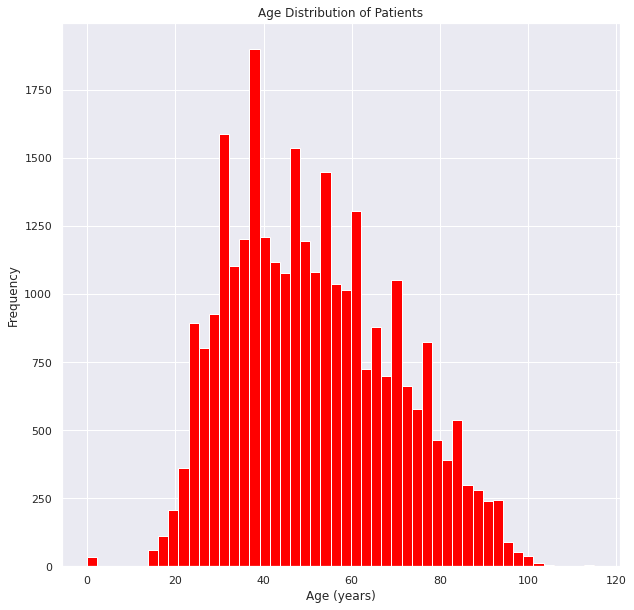

In [427]:
# age distribution visual
plt.hist(covid_df2['age_yrs'],color="red",bins = 50)
plt.title('Age Distribution of Patients')
plt.xlabel('Age (years)')
plt.ylabel('Frequency') 
plt.show()

In [428]:
covid_df2['history'].value_counts(dropna=False)
# Medical history is a boolean value with 0 representing no prior med hisory and 1 representing any sort of med history
# 16,459 with a 1.  14,122 with a 0.

1    15756
0    13517
Name: history, dtype: int64

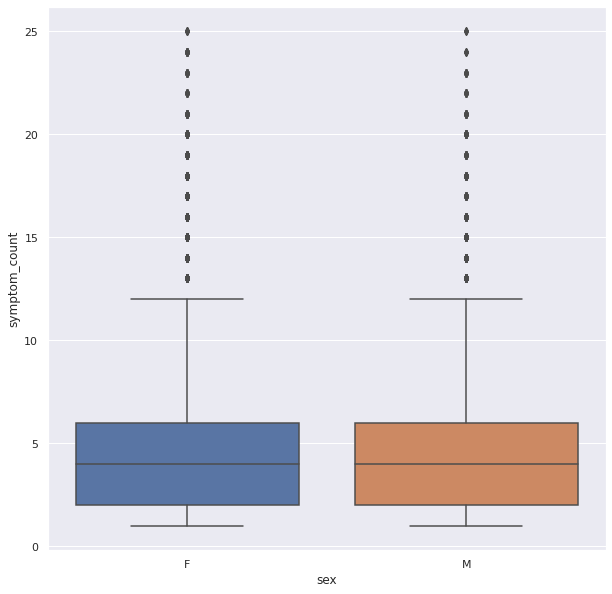

In [429]:
# Gender vs. Symptom count boxplot 
sns.set(rc={'figure.figsize':(10,10)})
box_sympt = sns.boxplot(x='sex', y='symptom_count', data=covid_df2)

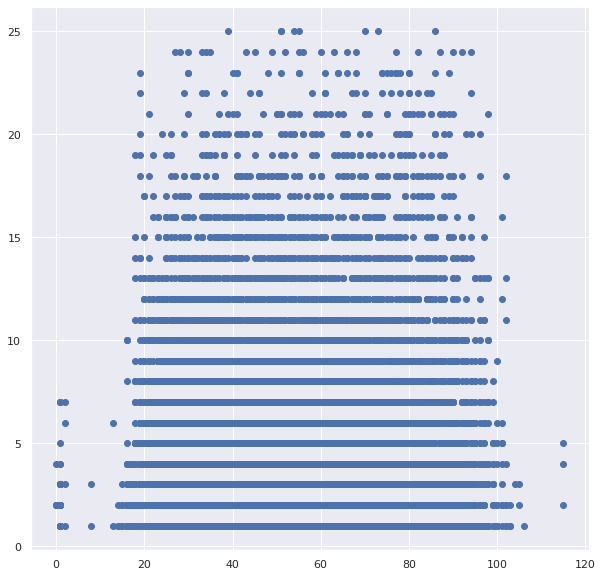

In [430]:
# Scatter plot visual of age vs. symptom count
plt.figure(figsize=(10,10))
plt.scatter(x=covid_df2['age_yrs'], y=covid_df2['symptom_count'])
plt.show()

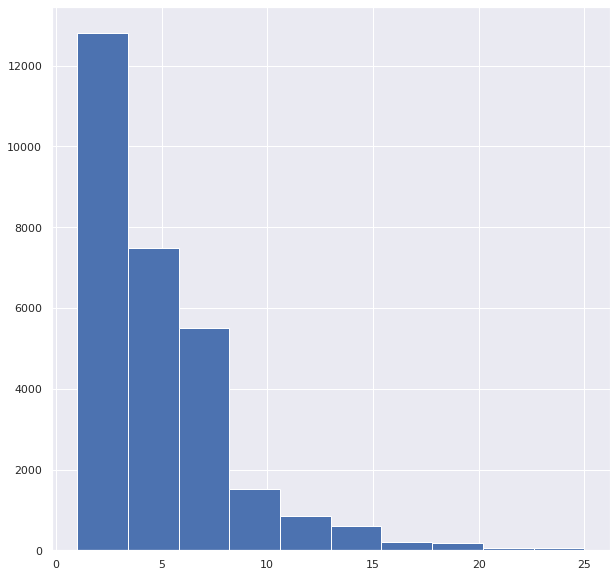

In [431]:
plt.hist(covid_df2['symptom_count'])
plt.show()

In [432]:
covid_df2['symptom_count'].describe()
#print(covid_df2['symptom_count'].value_counts(dropna=False))

count    29273.000000
mean         4.732621
std          3.463876
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         25.000000
Name: symptom_count, dtype: float64

In [433]:
covid_df2.shape

(29273, 22)

In [434]:
covid_df2 = covid_df2.reset_index()

In [435]:
#creating the target variable by giving a type a severity a value between 0 and 6
Target = []

for i in range(0,29273):
    if covid_df2['Count'][i] == 0:
        Target.append(0)
    elif covid_df2['Count'][i] == 1:
        if covid_df2['l_threat'][i] == 1:
            Target.append(1)
        elif covid_df2['died'][i] == 1:
            Target.append(6)
        elif covid_df2['hospital'][i] == 1:
            Target.append(2)
        elif covid_df2['disable'][i] == 1:
            Target.append(3)
        elif covid_df2['birth_defect'][i] == 1:
            Target.append(4)
    else:
        Target.append(5)


In [436]:
#len(Target)
#Adding Target list to dataframe as a new column - Target
covid_df2['Target'] = Target

In [437]:
covid_df2['Target'].value_counts()

0    23329
2     2515
6     1359
5     1246
3      448
1      340
4       36
Name: Target, dtype: int64

In [438]:
#creating array of Target collumn
NTarget = np.array(covid_df2['Target'])

In [439]:
#Names of Target variables
NTarget_Names = ['No Severity','Life Threatening','Hospitalized','Disabled','Birth Defect','Very Serious','Died']

In [440]:
#creating a new column by name of severity_name to identify the type of severity
covid_df2['severity_name'] = np.array([NTarget_Names[i] for i in NTarget])

In [441]:
covid_df2['severity_name'].value_counts()

No Severity         23329
Hospitalized         2515
Died                 1359
Very Serious         1246
Disabled              448
Life Threatening      340
Birth Defect           36
Name: severity_name, dtype: int64

In [442]:
# Assigning sex column a number and creating the new list by sex_num
# Male is assigned to 0, female assigned to 1
sex_num = []
for i in range(0,29273):
    if covid_df2['sex'][i] == 'M':
        sex_num.append(0)
    else:
        sex_num.append(1)

In [443]:
# Creating new column by name of sex_data and using the newly created list sex_data
covid_df2['sex_data'] = sex_num

In [444]:
# Assigning vax_manu a number and creating the new list by vaxmanu
# Moderna assigned to 0, Pfizer assigned to 1, Janssen assigned to 2
vaxmanu = []
for i in range(0,29273):
    if covid_df2['vax_manu'][i] == 'MODERNA':
        vaxmanu.append(0)
    elif covid_df2['vax_manu'][i] == 'PFIZER\BIONTECH':
        vaxmanu.append(1)
    elif covid_df2['vax_manu'][i] == 'JANSSEN':
        vaxmanu.append(2)

In [445]:
# Adding the new column vax_manu_data taking values from newly created list - vaxmanu.
covid_df2['vax_manu_data'] = vaxmanu

In [446]:
covid_df2['vax_manu_data'].value_counts()

0    15092
1    13091
2     1090
Name: vax_manu_data, dtype: int64

In [447]:
# Creating a new dataframe using the columns required and the target variable (severity_name)
covid_df_target = covid_df2[['age_yrs','sex_data','vax_manu_data','history','severity_name']]

In [448]:
covid_df_target.head()

,age_yrs,sex_data,vax_manu_data,history,severity_name
0,33.0,1,0,0,No Severity
1,73.0,1,0,1,No Severity
2,23.0,1,1,0,No Severity
3,58.0,1,0,1,No Severity
4,47.0,1,0,0,No Severity


In [449]:
# december 11, 2020 first pfizer vaccines
# no more than 30 symptom counts from first hand experience at a pharmaceutical company
# jan 14, 2021 dataset created

In [450]:
covid_df2.head()

,index,vaers_id,state,age_yrs,sex,died,l_threat,er_visit,hospital,hospdays,disable,recovd,vax_date,onset_date,numdays,other_meds,cur_ill,history,birth_defect,vax_manu,symptom_count,Count,severity,Target,severity_name,sex_data,vax_manu_data
0,0,916600,TX,33.0,F,0,0,0,0,0,0,Y,12/28/2020,12/30/2020,2,0,0,0,0,MODERNA,2,0,0,0,No Severity,1,0
1,1,916601,CA,73.0,F,0,0,0,0,0,0,Y,12/31/2020,12/31/2020,0,1,1,1,0,MODERNA,2,0,0,0,No Severity,1,0
2,2,916602,WA,23.0,F,0,0,0,0,0,0,U,12/31/2020,12/31/2020,0,0,0,0,0,PFIZER\BIONTECH,4,0,0,0,No Severity,1,1
3,3,916603,WA,58.0,F,0,0,0,0,0,0,Y,12/23/2020,12/23/2020,0,0,1,1,0,MODERNA,3,0,0,0,No Severity,1,0
4,4,916604,TX,47.0,F,0,0,0,0,0,0,N,12/22/2020,12/29/2020,7,1,1,0,0,MODERNA,4,0,0,0,No Severity,1,0


In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

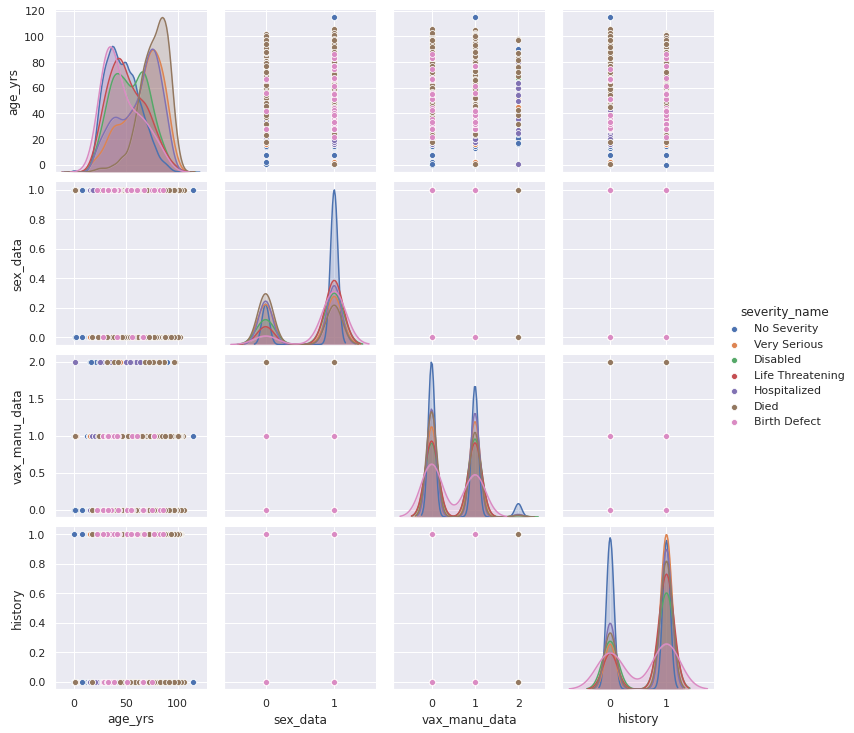

In [452]:
#pairplot of the variables
sns.pairplot(covid_df_target, hue='severity_name')

In [453]:
#generating the variables test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(covid_df_target[['age_yrs','sex_data','vax_manu_data','history']], NTarget , test_size=0.5, stratify=NTarget, random_state=123456)


In [454]:
#random forest classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=123456)

In [455]:
#accuracy
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.791
Mean accuracy score: 0.794


In [456]:
#predicting a particular value
rf.predict([[90,0,1,1]])

array([6])

In [457]:
#metrics classification report
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     11665
           1       0.00      0.00      0.00       170
           2       0.25      0.09      0.13      1258
           3       0.00      0.00      0.00       224
           4       0.00      0.00      0.00        18
           5       0.14      0.03      0.05       623
           6       0.31      0.21      0.25       679

    accuracy                           0.79     14637
   macro avg       0.22      0.19      0.19     14637
weighted avg       0.71      0.79      0.74     14637



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


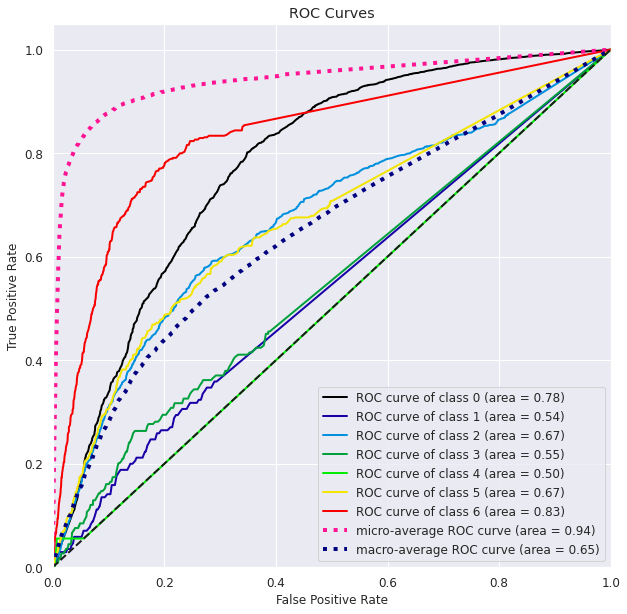

In [458]:
#ROC curve for linear regression model
!pip install --user scikit-plot
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = rf.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)

plt.show()

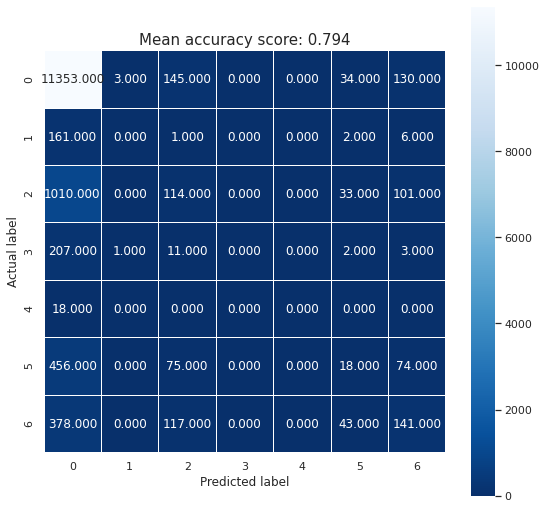

In [459]:
#Heat map for actual and predicted labels
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Mean accuracy score: {accuracy:.3}'
plt.title(all_sample_title, size = 15);

In [460]:
#Using logistic regression for the same model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print(score)

0.8002322880371661


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [461]:
#classification report for logistic regression
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     11665
           1       0.00      0.00      0.00       170
           2       0.17      0.02      0.03      1258
           3       0.00      0.00      0.00       224
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00       623
           6       0.36      0.19      0.25       679

    accuracy                           0.80     14637
   macro avg       0.19      0.17      0.17     14637
weighted avg       0.68      0.80      0.73     14637



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


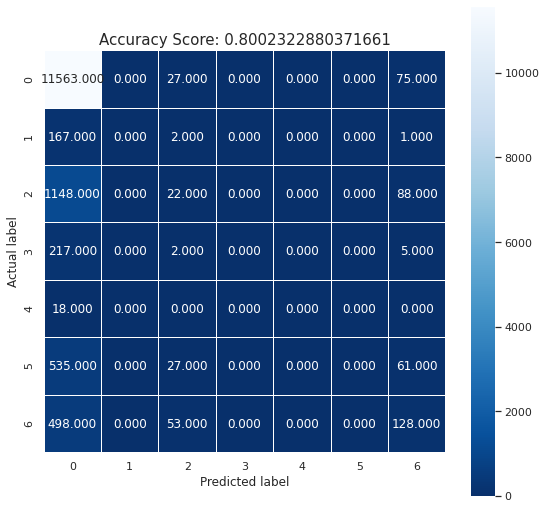

In [462]:
#Heat map for actual and predicted values
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

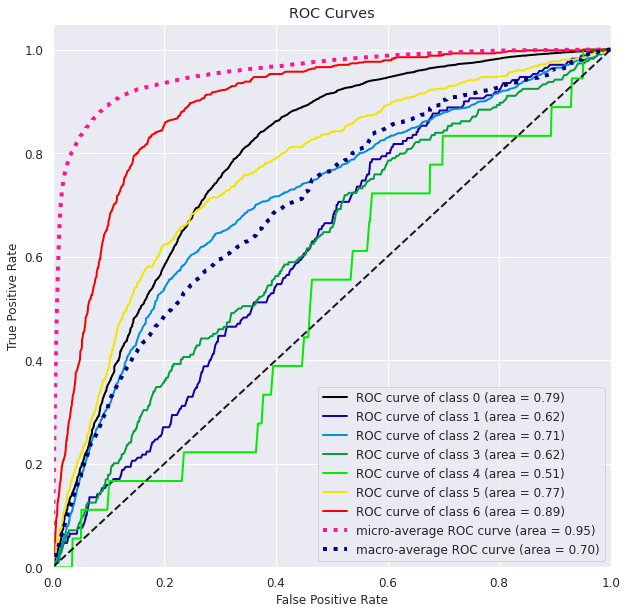

In [463]:
#ROC curves for logistic regression
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas = logreg.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)

plt.show()

In [464]:
#using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

0.7433900389424062


In [465]:
#classification report for gradient boosting classification
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11665
           1       0.00      0.00      0.00       170
           2       0.00      0.00      0.00      1258
           3       0.02      0.08      0.03       224
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00       623
           6       0.23      0.59      0.33       679

    accuracy                           0.74     14637
   macro avg       0.16      0.22      0.18     14637
weighted avg       0.71      0.74      0.72     14637



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


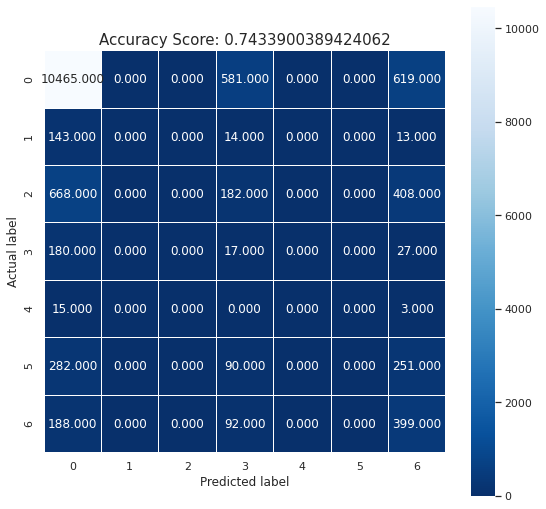

In [466]:
#Heat map for actual and predicted values for gradient boosting classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

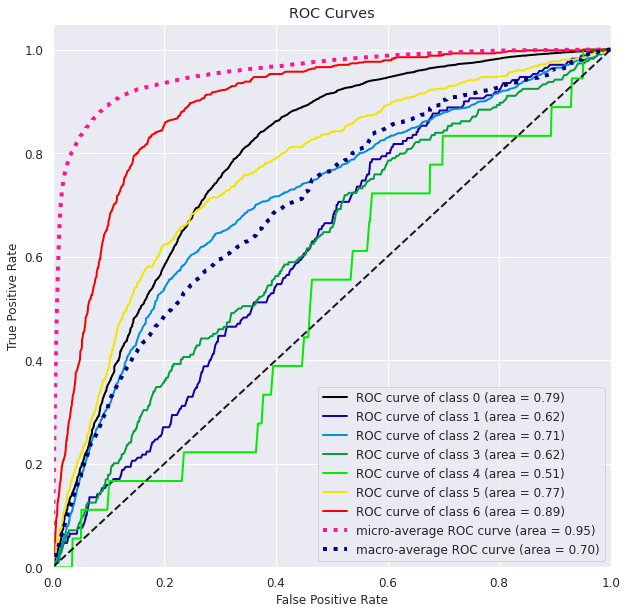

In [467]:
#ROC curve for gradient boosting classifier
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas1 = clf.predict_proba(X_test)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, predicted_probas)

plt.show()

In [469]:
#Now reducing the target variables from 7 to 2 (severe-sideeffects and no severity)

In [470]:
#creating array of Severity collumn
Nseverity = np.array(covid_df2['severity'])

In [471]:
#Names of severity variables
Nseverity_Names = ['No Severity','Severe Side-effects']

In [472]:
#creating a new column by name of severity_type to identify the type of severity
covid_df2['severity_type'] = np.array([Nseverity_Names[i] for i in Nseverity])

In [473]:
covid_df2.head()

,index,vaers_id,state,age_yrs,sex,died,l_threat,er_visit,hospital,hospdays,disable,recovd,vax_date,onset_date,numdays,other_meds,cur_ill,history,birth_defect,vax_manu,symptom_count,Count,severity,Target,severity_name,sex_data,vax_manu_data,severity_type
0,0,916600,TX,33.0,F,0,0,0,0,0,0,Y,12/28/2020,12/30/2020,2,0,0,0,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
1,1,916601,CA,73.0,F,0,0,0,0,0,0,Y,12/31/2020,12/31/2020,0,1,1,1,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
2,2,916602,WA,23.0,F,0,0,0,0,0,0,U,12/31/2020,12/31/2020,0,0,0,0,0,PFIZER\BIONTECH,4,0,0,0,No Severity,1,1,No Severity
3,3,916603,WA,58.0,F,0,0,0,0,0,0,Y,12/23/2020,12/23/2020,0,0,1,1,0,MODERNA,3,0,0,0,No Severity,1,0,No Severity
4,4,916604,TX,47.0,F,0,0,0,0,0,0,N,12/22/2020,12/29/2020,7,1,1,0,0,MODERNA,4,0,0,0,No Severity,1,0,No Severity


In [474]:
covid_df2['severity_type'].value_counts()

No Severity            23329
Severe Side-effects     5944
Name: severity_type, dtype: int64

In [475]:
# Creating a new dataframe using the columns required and the target variable (severity_type)
covid_df_target2 = covid_df2[['age_yrs','sex_data','vax_manu_data','history','severity_type']]

In [476]:
covid_df_target2.head()

,age_yrs,sex_data,vax_manu_data,history,severity_type
0,33.0,1,0,0,No Severity
1,73.0,1,0,1,No Severity
2,23.0,1,1,0,No Severity
3,58.0,1,0,1,No Severity
4,47.0,1,0,0,No Severity


In [477]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

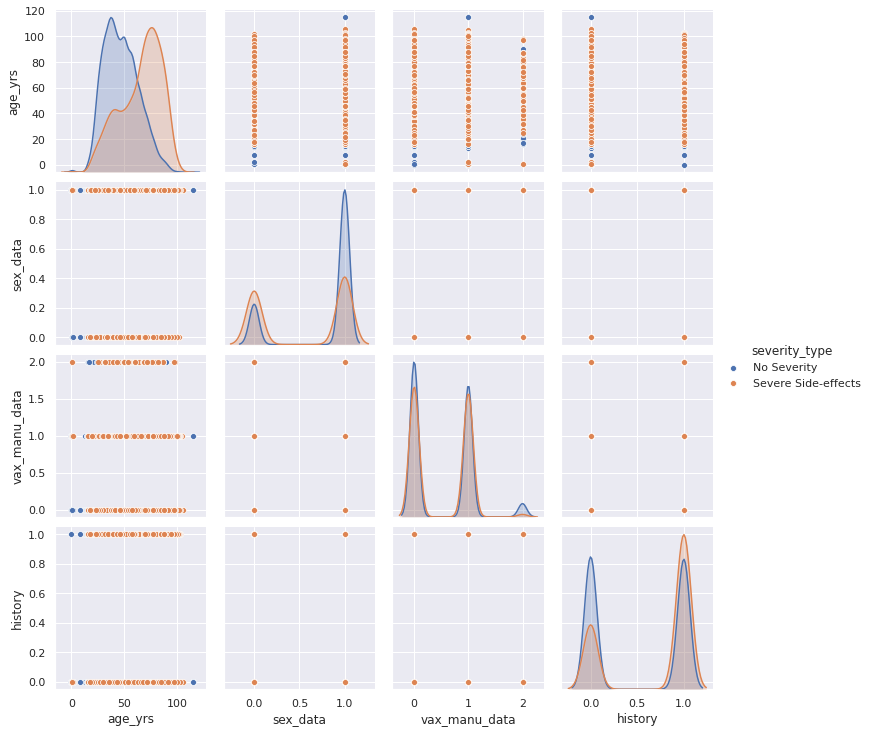

In [478]:
#pairplot of the variables
sns.pairplot(covid_df_target2, hue='severity_type')

In [479]:
#generating the variables test and train
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(covid_df_target2[['age_yrs','sex_data','vax_manu_data','history']], covid_df_target2[['severity_type']] , test_size=0.2, stratify=Nseverity, random_state=123456)


In [480]:
#random forest classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train1, y_train1)

<ipython-input-480-c792ef245b45>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train1, y_train1)


RandomForestClassifier(oob_score=True, random_state=123456)

In [481]:
#accuracy
from sklearn.metrics import accuracy_score
predicted1 = rf.predict(X_test1)
accuracy = accuracy_score(y_test1, predicted1)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.836
Mean accuracy score: 0.834


<AxesSubplot:>

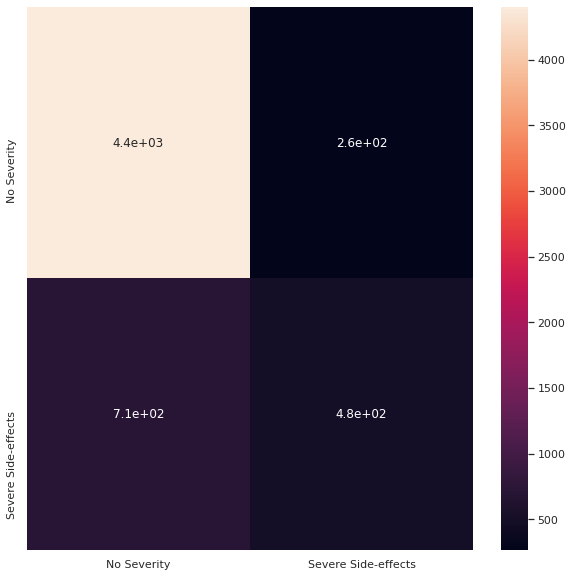

In [482]:
#heatmap
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test1, predicted1), columns=Nseverity_Names, index=Nseverity_Names)
sns.heatmap(cm, annot=True)

In [483]:
#predicting a particular value
rf.predict([[84,1,0,1]])

array(['Severe Side-effects'], dtype=object)

In [484]:
#metrics classification report for random forest
from sklearn import metrics
print(metrics.classification_report(y_test1, predicted1))

                     precision    recall  f1-score   support

        No Severity       0.86      0.94      0.90      4666
Severe Side-effects       0.65      0.40      0.50      1189

           accuracy                           0.83      5855
          macro avg       0.75      0.67      0.70      5855
       weighted avg       0.82      0.83      0.82      5855



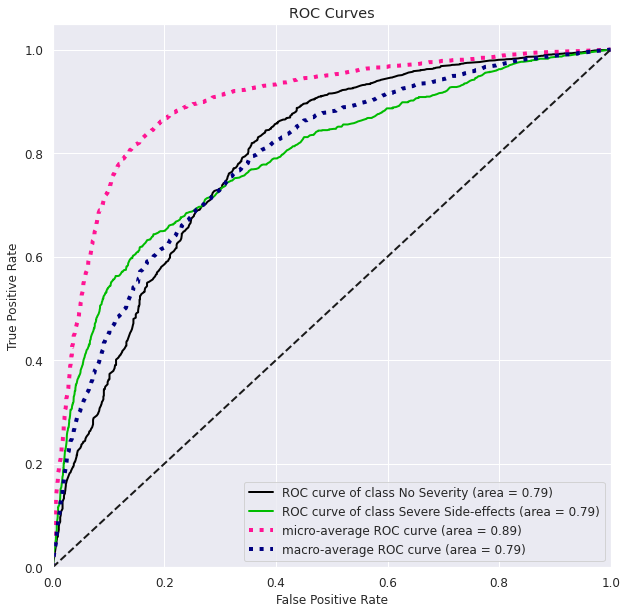

In [485]:
#ROC curve for random forest classification
!pip install --user scikit-plot
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas1 = rf.predict_proba(X_test1)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test1, predicted_probas1)

plt.show()

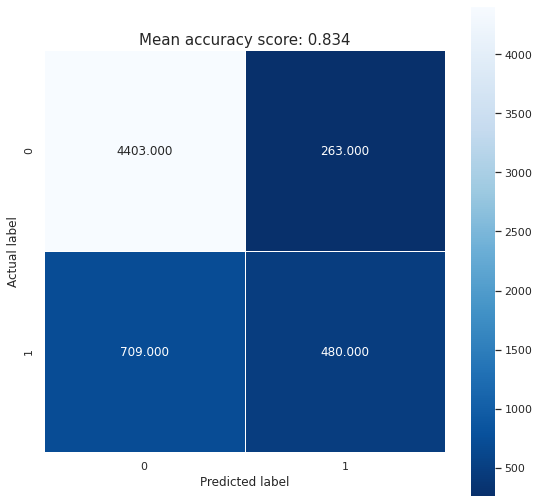

In [486]:
#Heat map for predicted and actual values for random forest classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test1, predicted1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Mean accuracy score: {accuracy:.3}'
plt.title(all_sample_title, size = 15);

In [487]:
#Now using logistic regression for the same
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
predictions1 = logreg.predict(X_test1)
score = logreg.score(X_test1, y_test1)
print(score)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8355251921434671


In [488]:
#classification report for logistic regression
from sklearn.metrics import classification_report
print(classification_report(y_test1, predictions1))

                     precision    recall  f1-score   support

        No Severity       0.85      0.96      0.90      4666
Severe Side-effects       0.68      0.36      0.47      1189

           accuracy                           0.84      5855
          macro avg       0.77      0.66      0.69      5855
       weighted avg       0.82      0.84      0.81      5855



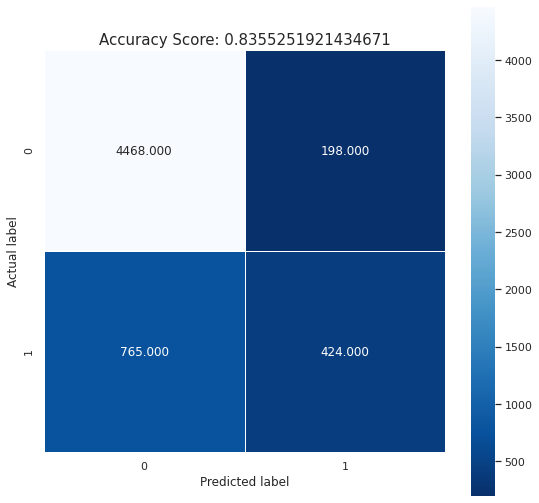

In [489]:
#Heat map for actual and predicted values for logistic regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test1, predictions1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

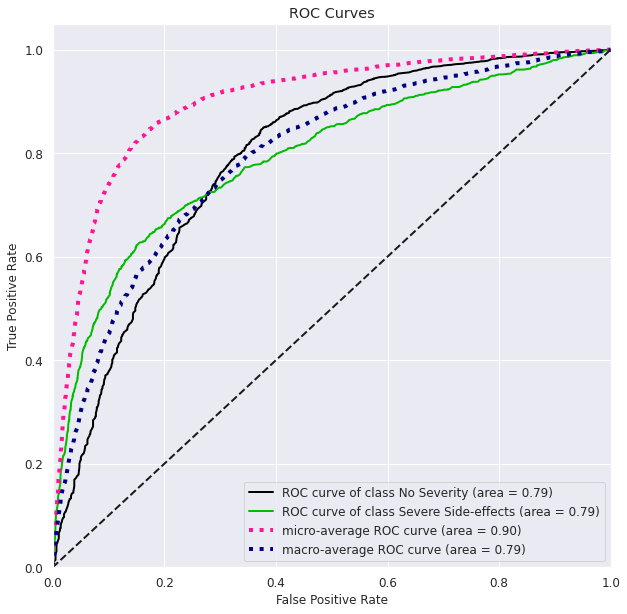

In [490]:
#ROC curve for logistic regression
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas1 = logreg.predict_proba(X_test1)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test1, predicted_probas1)

plt.show()

In [491]:
#using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train1, y_train1)
predictions1 = clf.predict(X_test1)
score = clf.score(X_test1, y_test1)
print(score)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8384286934244236


In [492]:
#classification report for gradient boosting classification
from sklearn.metrics import classification_report
print(classification_report(y_test1, predictions1))

                     precision    recall  f1-score   support

        No Severity       0.86      0.95      0.90      4666
Severe Side-effects       0.67      0.40      0.50      1189

           accuracy                           0.84      5855
          macro avg       0.77      0.67      0.70      5855
       weighted avg       0.82      0.84      0.82      5855



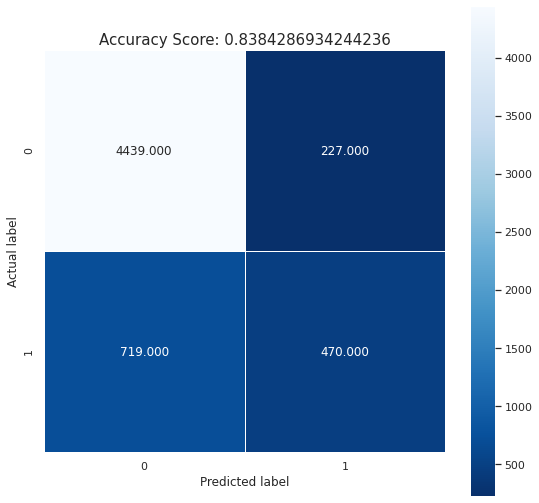

In [493]:
#Heat map for actual and predicted values for gradient boosting classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test1, predictions1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

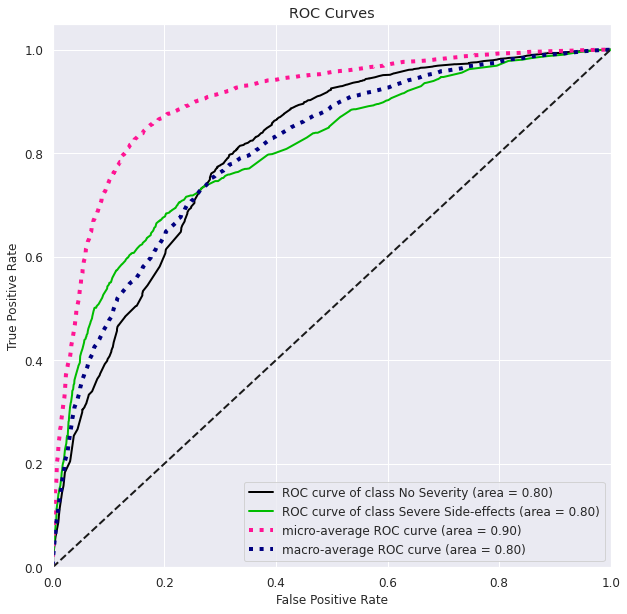

In [494]:
#ROC curve for gradient boosting classifier
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas1 = clf.predict_proba(X_test1)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test1, predicted_probas1)

plt.show()

In [495]:
clf.predict([[90,1,1,1]])

array(['Severe Side-effects'], dtype=object)

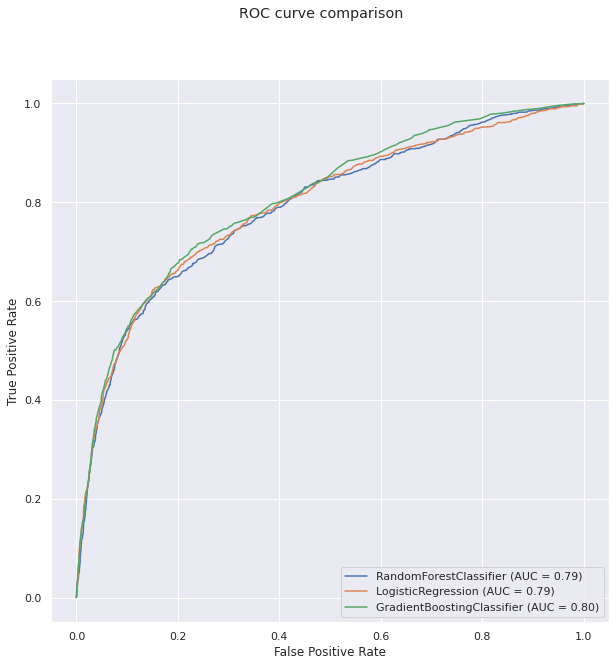

In [496]:
#comparision of ROC curves
from sklearn.metrics import plot_roc_curve


fig = plot_roc_curve( rf, X_test1, y_test1)
fig = plot_roc_curve( logreg, X_test1, y_test1, ax = fig.ax_)
fig = plot_roc_curve( clf, X_test1, y_test1, ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison")
plt.show() 

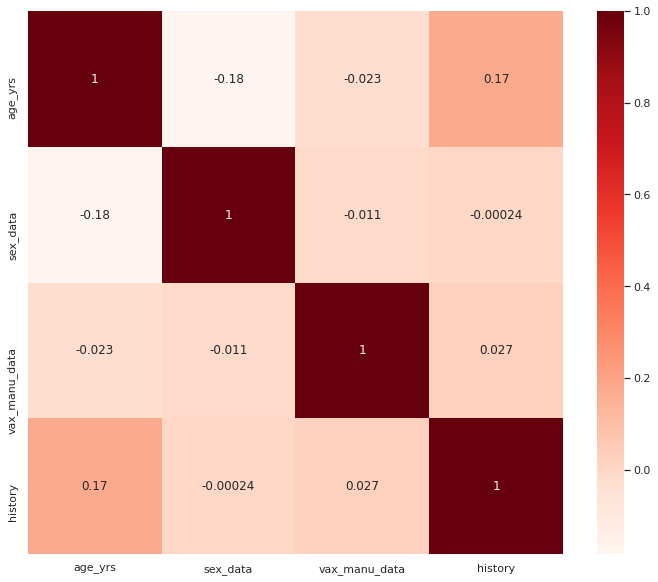

In [497]:
#Using Pearson Correlation to find out correlation between the input variables
plt.figure(figsize=(12,10))
cor = covid_df_target2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [498]:
covid_df_target2.head()

,age_yrs,sex_data,vax_manu_data,history,severity_type
0,33.0,1,0,0,No Severity
1,73.0,1,0,1,No Severity
2,23.0,1,1,0,No Severity
3,58.0,1,0,1,No Severity
4,47.0,1,0,0,No Severity


In [499]:
#Now to avoid the errors due to high value of 'no severity' data, we plan to equalise both the target variables 
#and remodel the data using random forest

In [500]:
#Creating new dataframe - covid_New which only has rows which have severity_type as No severity
covid_New = covid_df2[covid_df2['severity_type'] == 'No Severity']

In [501]:
covid_New.head()

,index,vaers_id,state,age_yrs,sex,died,l_threat,er_visit,hospital,hospdays,disable,recovd,vax_date,onset_date,numdays,other_meds,cur_ill,history,birth_defect,vax_manu,symptom_count,Count,severity,Target,severity_name,sex_data,vax_manu_data,severity_type
0,0,916600,TX,33.0,F,0,0,0,0,0,0,Y,12/28/2020,12/30/2020,2,0,0,0,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
1,1,916601,CA,73.0,F,0,0,0,0,0,0,Y,12/31/2020,12/31/2020,0,1,1,1,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
2,2,916602,WA,23.0,F,0,0,0,0,0,0,U,12/31/2020,12/31/2020,0,0,0,0,0,PFIZER\BIONTECH,4,0,0,0,No Severity,1,1,No Severity
3,3,916603,WA,58.0,F,0,0,0,0,0,0,Y,12/23/2020,12/23/2020,0,0,1,1,0,MODERNA,3,0,0,0,No Severity,1,0,No Severity
4,4,916604,TX,47.0,F,0,0,0,0,0,0,N,12/22/2020,12/29/2020,7,1,1,0,0,MODERNA,4,0,0,0,No Severity,1,0,No Severity


In [502]:
covid_New['severity_type'].value_counts()

No Severity    23329
Name: severity_type, dtype: int64

In [503]:
#Selecting random 5944 rows from covid_New data frame. (As severity values are 5944)
covid_New = covid_New.sample(n=5944)

In [504]:
covid_New['severity_type'].value_counts()

No Severity    5944
Name: severity_type, dtype: int64

In [505]:
#Creating new dataframe - covid_New2 which only has rows which have severity_type as Severe Side-effects
covid_New2 = covid_df2[covid_df2['severity_type'] == 'Severe Side-effects']

In [506]:
covid_New2['severity_type'].value_counts()

Severe Side-effects    5944
Name: severity_type, dtype: int64

In [507]:
#Appending rows of covid_New2 to covid_New and creating a new dataframe - 'covid_New3'
covid_New3 = covid_New.append(covid_New2)

In [508]:
covid_New3['severity_type'].value_counts()

No Severity            5944
Severe Side-effects    5944
Name: severity_type, dtype: int64

In [509]:
covid_New3.head()

,index,vaers_id,state,age_yrs,sex,died,l_threat,er_visit,hospital,hospdays,disable,recovd,vax_date,onset_date,numdays,other_meds,cur_ill,history,birth_defect,vax_manu,symptom_count,Count,severity,Target,severity_name,sex_data,vax_manu_data,severity_type
23922,26755,1049465,CA,18.0,F,0,0,0,0,0,0,Y,2/22/2021,2/22/2021,0,1,0,0,0,PFIZER\BIONTECH,2,0,0,0,No Severity,1,1,No Severity
5147,5534,923102,GA,50.0,F,0,0,0,0,0,0,U,12/29/2020,12/31/2020,2,0,0,0,0,MODERNA,1,0,0,0,No Severity,1,0,No Severity
10364,11197,928565,CT,22.0,F,0,0,0,0,0,0,Y,1/8/2021,1/8/2021,0,0,1,0,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
9197,9859,940705,U,55.0,M,0,0,0,0,0,0,Y,12/24/2020,12/30/2020,6,0,0,0,0,MODERNA,4,0,0,0,No Severity,0,0,No Severity
1872,1936,918870,OH,52.0,F,0,0,0,0,0,0,Y,12/22/2020,12/22/2020,0,1,1,1,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity


In [510]:
#resetting the index
covid_New3 = covid_New3.reset_index()

In [511]:
covid_New3.head()

,level_0,index,vaers_id,state,age_yrs,sex,died,l_threat,er_visit,hospital,hospdays,disable,recovd,vax_date,onset_date,numdays,other_meds,cur_ill,history,birth_defect,vax_manu,symptom_count,Count,severity,Target,severity_name,sex_data,vax_manu_data,severity_type
0,23922,26755,1049465,CA,18.0,F,0,0,0,0,0,0,Y,2/22/2021,2/22/2021,0,1,0,0,0,PFIZER\BIONTECH,2,0,0,0,No Severity,1,1,No Severity
1,5147,5534,923102,GA,50.0,F,0,0,0,0,0,0,U,12/29/2020,12/31/2020,2,0,0,0,0,MODERNA,1,0,0,0,No Severity,1,0,No Severity
2,10364,11197,928565,CT,22.0,F,0,0,0,0,0,0,Y,1/8/2021,1/8/2021,0,0,1,0,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
3,9197,9859,940705,U,55.0,M,0,0,0,0,0,0,Y,12/24/2020,12/30/2020,6,0,0,0,0,MODERNA,4,0,0,0,No Severity,0,0,No Severity
4,1872,1936,918870,OH,52.0,F,0,0,0,0,0,0,Y,12/22/2020,12/22/2020,0,1,1,1,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity


In [512]:
#Selecting the final dataframe with input and target variable
covid_Newfinal = covid_New3[['age_yrs','sex_data','vax_manu_data','history','severity_type']]

In [513]:
covid_Newfinal.head()

,age_yrs,sex_data,vax_manu_data,history,severity_type
0,18.0,1,1,0,No Severity
1,50.0,1,0,0,No Severity
2,22.0,1,0,0,No Severity
3,55.0,0,0,0,No Severity
4,52.0,1,0,1,No Severity


In [514]:
#creating array of Severity collumn
Newseverity = np.array(covid_New3['severity'])

In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

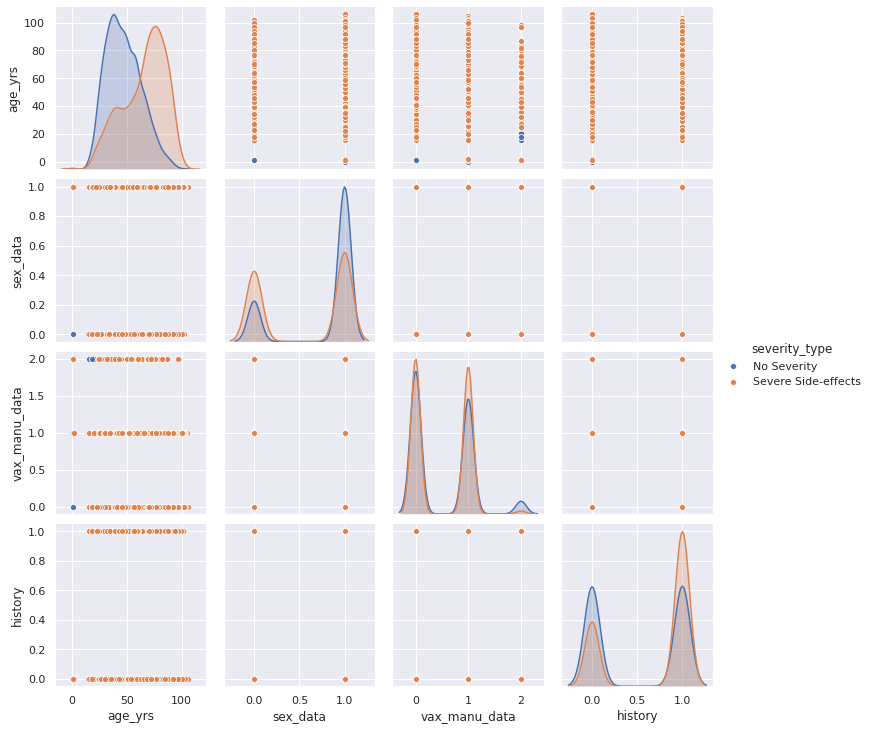

In [516]:
#pairplot of the variables
sns.pairplot(covid_Newfinal, hue='severity_type')

In [517]:
#generating the variables test and train
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(covid_Newfinal[['age_yrs','sex_data','vax_manu_data','history']], covid_Newfinal[['severity_type']] , test_size=0.5, stratify=Newseverity, random_state=123456)


In [518]:
#random forest classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train2, y_train2)

<ipython-input-518-8200cfee73a1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train2, y_train2)


RandomForestClassifier(oob_score=True, random_state=123456)

In [519]:
#accuracy
from sklearn.metrics import accuracy_score
predicted2 = rf.predict(X_test2)
accuracy = accuracy_score(y_test2, predicted2)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.705
Mean accuracy score: 0.724


<AxesSubplot:>

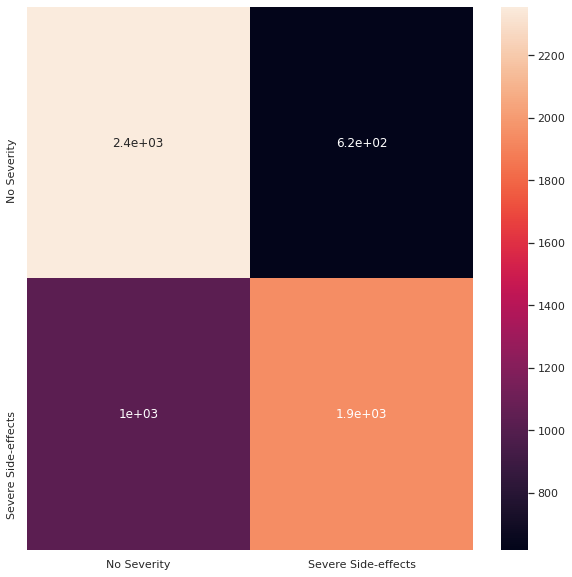

In [520]:
#heatmap
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test2, predicted2), columns=Nseverity_Names, index=Nseverity_Names)
sns.heatmap(cm, annot=True)

In [521]:
#predicting a particular value
rf.predict([[90,0,0,1]])

array(['Severe Side-effects'], dtype=object)

In [522]:
#classification report for random forest model
from sklearn import metrics
print(metrics.classification_report(y_test2, predicted2))

                     precision    recall  f1-score   support

        No Severity       0.70      0.79      0.74      2972
Severe Side-effects       0.76      0.66      0.70      2972

           accuracy                           0.72      5944
          macro avg       0.73      0.72      0.72      5944
       weighted avg       0.73      0.72      0.72      5944



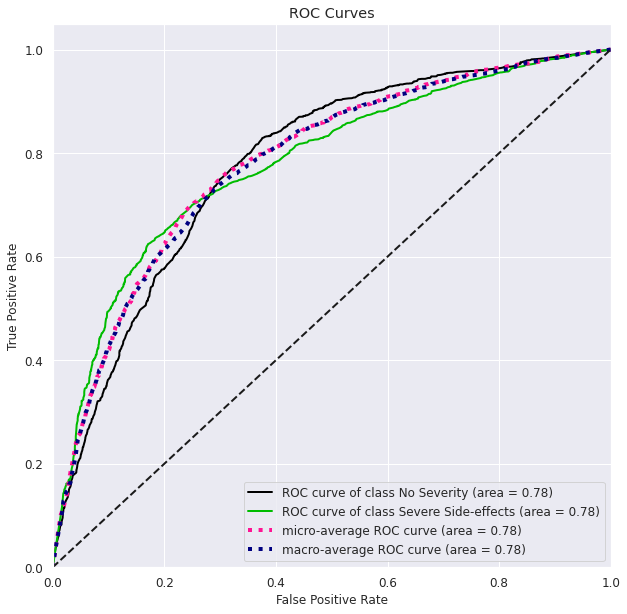

In [523]:
#ROC curve for the random forest model
#!pip install --user scikit-plot
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas21 = rf.predict_proba(X_test2)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test2, predicted_probas21)

plt.show()

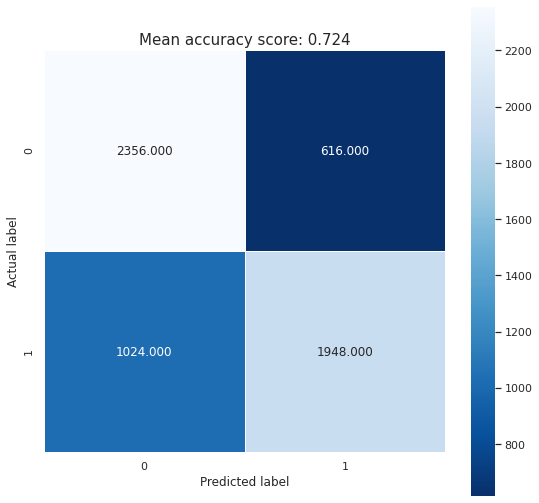

In [524]:
#Heat map for actual and predicted values
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test2, predicted2)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Mean accuracy score: {accuracy:.3}'
plt.title(all_sample_title, size = 15);

In [525]:
#Now using logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train2, y_train2)
predictions2 = logreg.predict(X_test2)
score = logreg.score(X_test2, y_test2)
print(score)

0.7330080753701211


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [526]:
#classification report for logistic regression
from sklearn.metrics import classification_report
print(classification_report(y_test2, predictions2))

                     precision    recall  f1-score   support

        No Severity       0.72      0.75      0.74      2972
Severe Side-effects       0.74      0.71      0.73      2972

           accuracy                           0.73      5944
          macro avg       0.73      0.73      0.73      5944
       weighted avg       0.73      0.73      0.73      5944



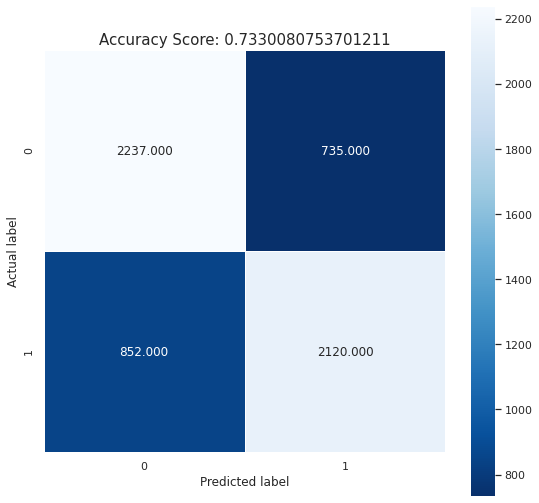

In [527]:
#Heat map for actual and predicted values for logistic regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test2, predictions2)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

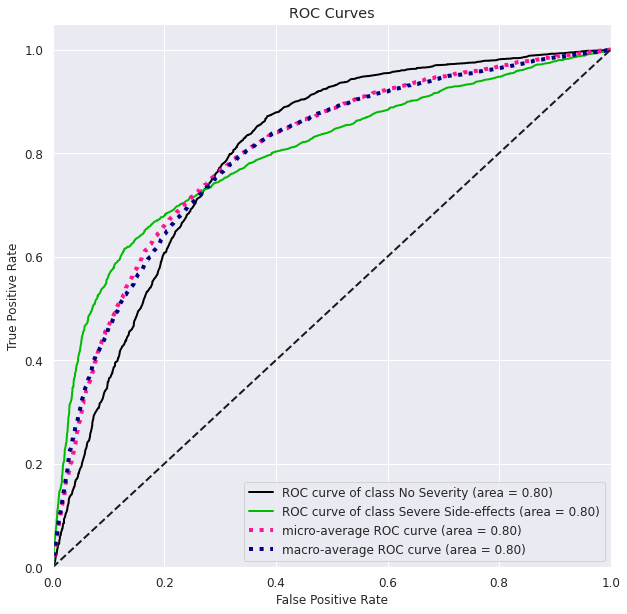

In [528]:
#ROC curve for logistic regression
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas22 = logreg.predict_proba(X_test2)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test2, predicted_probas22)

plt.show()

In [529]:
logreg.predict([[90,0,0,1]])

array(['Severe Side-effects'], dtype=object)

In [530]:
#using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train2, y_train2)
predictions2 = clf.predict(X_test2)
score = clf.score(X_test2, y_test2)
print(score)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7427658142664872


In [531]:
#classification report for gradient boosting classification
from sklearn.metrics import classification_report
print(classification_report(y_test2, predictions2))

                     precision    recall  f1-score   support

        No Severity       0.71      0.81      0.76      2972
Severe Side-effects       0.78      0.67      0.72      2972

           accuracy                           0.74      5944
          macro avg       0.75      0.74      0.74      5944
       weighted avg       0.75      0.74      0.74      5944



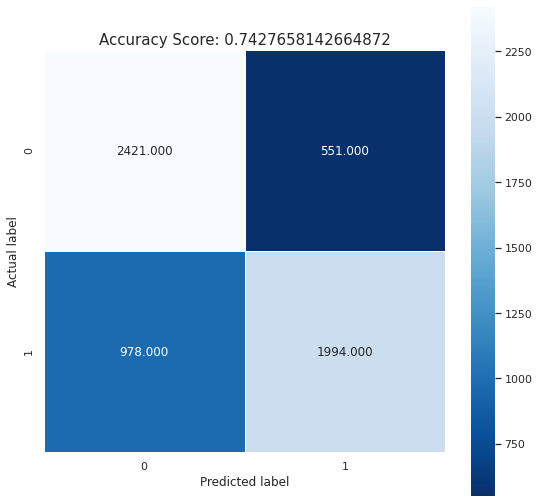

In [532]:
#Heat map for actual and predicted values for gradient boosting classification
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test2, predictions2)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

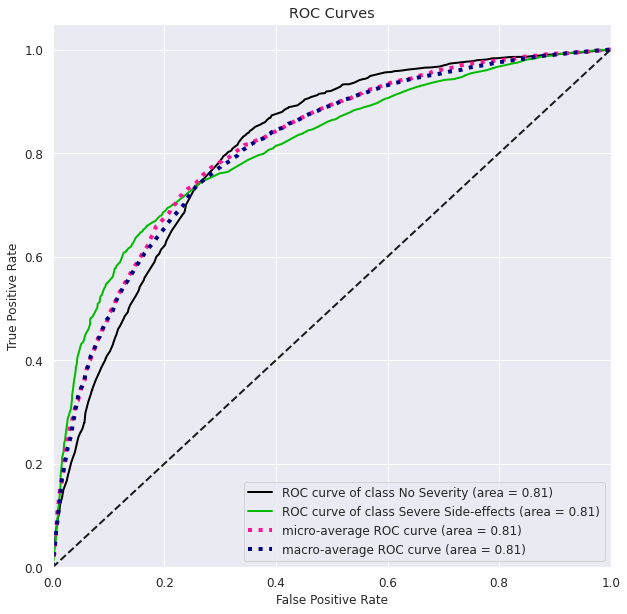

In [533]:
#ROC curve for gradient boosting classifier
plt.rcParams['figure.figsize'] = [10, 10]

predicted_probas23 = clf.predict_proba(X_test2)
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_roc(y_test2, predicted_probas23)

plt.show()

In [534]:
clf.predict([[90,0,0,1]])

array(['Severe Side-effects'], dtype=object)

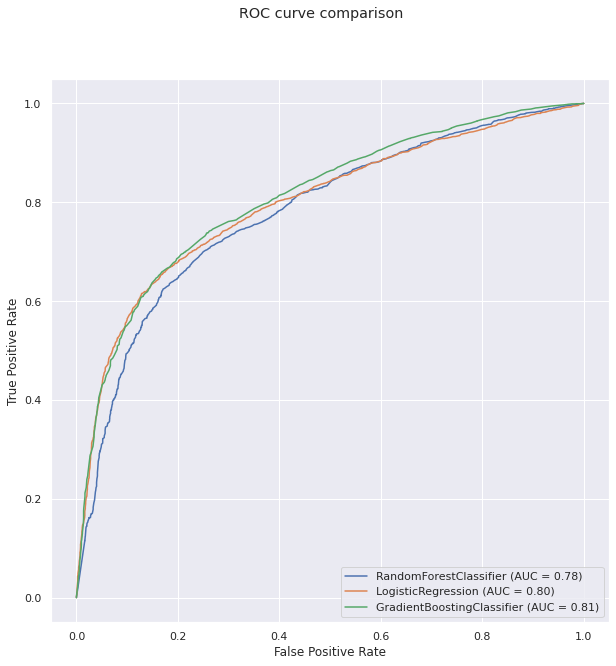

In [535]:
#comparision of ROC curves 
from sklearn.metrics import plot_roc_curve


fig = plot_roc_curve( rf, X_test2, y_test2)
fig = plot_roc_curve( logreg, X_test2, y_test2, ax = fig.ax_)
fig = plot_roc_curve( clf, X_test2, y_test2, ax = fig.ax_)
fig.figure_.suptitle("ROC curve comparison")
plt.show() 

In [536]:
covid_df2.head()

,index,vaers_id,state,age_yrs,sex,died,l_threat,er_visit,hospital,hospdays,disable,recovd,vax_date,onset_date,numdays,other_meds,cur_ill,history,birth_defect,vax_manu,symptom_count,Count,severity,Target,severity_name,sex_data,vax_manu_data,severity_type
0,0,916600,TX,33.0,F,0,0,0,0,0,0,Y,12/28/2020,12/30/2020,2,0,0,0,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
1,1,916601,CA,73.0,F,0,0,0,0,0,0,Y,12/31/2020,12/31/2020,0,1,1,1,0,MODERNA,2,0,0,0,No Severity,1,0,No Severity
2,2,916602,WA,23.0,F,0,0,0,0,0,0,U,12/31/2020,12/31/2020,0,0,0,0,0,PFIZER\BIONTECH,4,0,0,0,No Severity,1,1,No Severity
3,3,916603,WA,58.0,F,0,0,0,0,0,0,Y,12/23/2020,12/23/2020,0,0,1,1,0,MODERNA,3,0,0,0,No Severity,1,0,No Severity
4,4,916604,TX,47.0,F,0,0,0,0,0,0,N,12/22/2020,12/29/2020,7,1,1,0,0,MODERNA,4,0,0,0,No Severity,1,0,No Severity


In [537]:
covid_comp = covid_df2[['age_yrs','sex','severity','severity_type']]

In [538]:
covid_comp.head()

,age_yrs,sex,severity,severity_type
0,33.0,F,0,No Severity
1,73.0,F,0,No Severity
2,23.0,F,0,No Severity
3,58.0,F,0,No Severity
4,47.0,F,0,No Severity


In [539]:
No_Severity_age = covid_comp[covid_comp['severity'] == 0]['age_yrs']
Severity_age = covid_comp[covid_comp['severity'] == 1]['age_yrs']
#stats.ttest_ind(female_viq, male_viq) 

In [540]:
#Normality test
from scipy import stats
stats.normaltest(No_Severity_age)

NormaltestResult(statistic=737.0026831441871, pvalue=9.160111947441657e-161)

In [541]:
stats.normaltest(Severity_age)

NormaltestResult(statistic=450.82866193775004, pvalue=1.2699888800188004e-98)

In [542]:
stats.mannwhitneyu(No_Severity_age,Severity_age)

MannwhitneyuResult(statistic=32459234.0, pvalue=0.0)

In [543]:
No_Severity_age.describe()

count    23329.000000
mean        47.431866
std         16.040632
min          0.000000
25%         35.000000
50%         46.000000
75%         58.000000
max        115.000000
Name: age_yrs, dtype: float64

In [544]:
Severity_age.describe()

count    5944.000000
mean       65.932705
std        19.470628
min         1.000000
25%        52.000000
50%        70.000000
75%        81.000000
max       106.000000
Name: age_yrs, dtype: float64

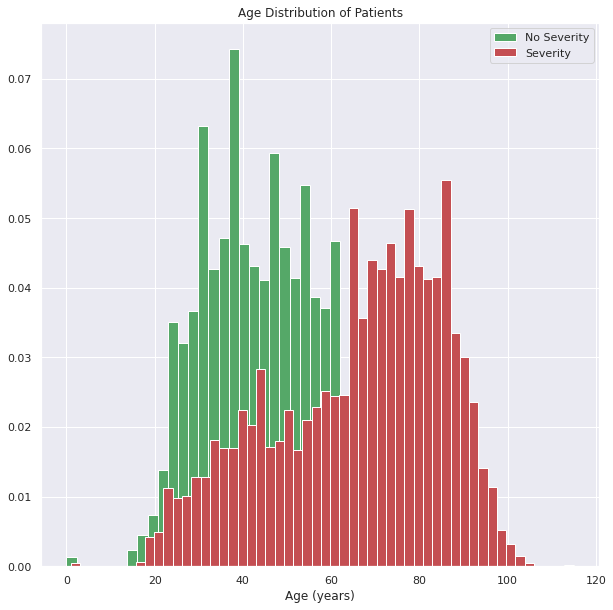

In [545]:
# age distribution visual
plt.hist(No_Severity_age, bins=50, weights = np.array(len(No_Severity_age)*[1.0])/len(No_Severity_age),color='g', label = 'No Severity')
plt.hist(Severity_age, bins=50, weights = np.array(len(Severity_age)*[1.0])/len(Severity_age),color='r', label = 'Severity')
plt.title('Age Distribution of Patients')
plt.xlabel('Age (years)')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Density plot for age of patients with severity and No Severity')

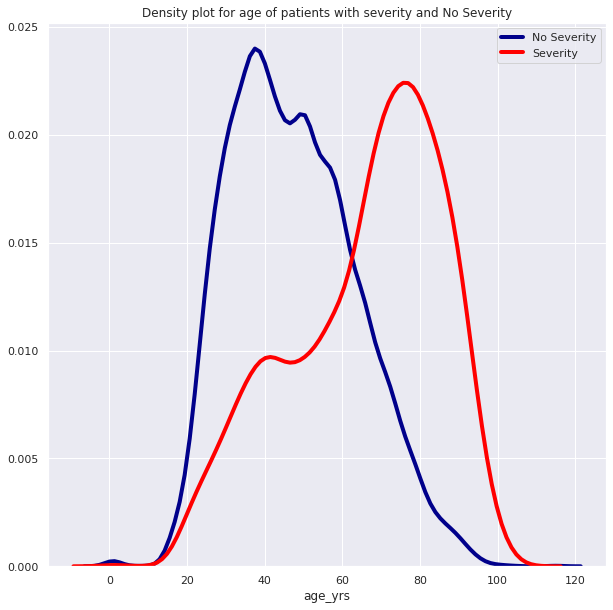

In [546]:
#density plot
sns.distplot(No_Severity_age, hist=False, kde=True, bins=50, color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},label = 'No Severity')
sns.distplot(Severity_age, hist=False, kde=True, bins=50, color = 'red', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4}, label = 'Severity')
plt.legend()
plt.title('Density plot for age of patients with severity and No Severity')